In [6]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]
rcParams['font.family'] = ['serif']
rcParams['font.size'] = 12
plt.rcParams['axes.axisbelow'] = True
import numpy as np

%matplotlib notebook

<IPython.core.display.Javascript object>


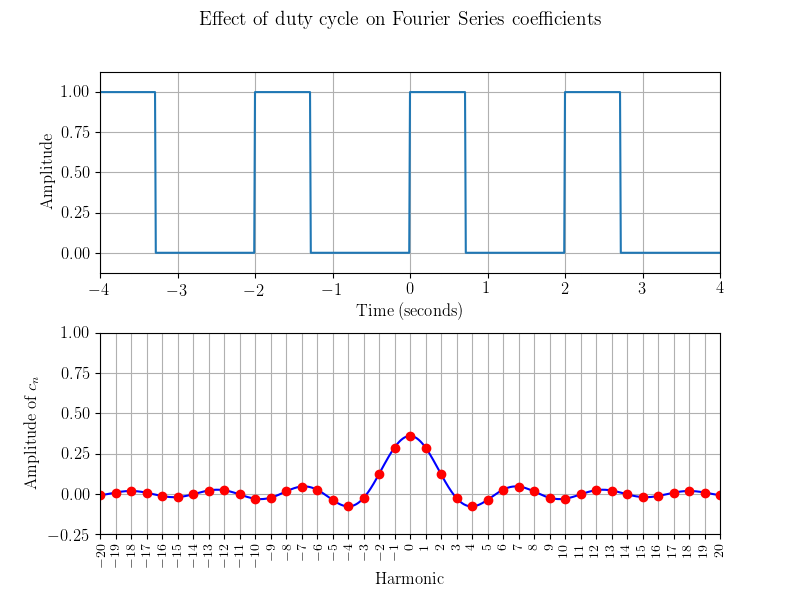

interactive(children=(FloatSlider(value=0.5, description='Duty Cycle', max=0.99, min=0.01, step=0.01), Output(…

In [7]:
from math import ceil
amplitude = 1.0
duty_cycle = 0.5
harmonics = 20
period = 2
start = -4
stop = 4
step = 1/100
time = np.arange(start, stop, step)
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
fig.suptitle('Effect of duty cycle on Fourier Series coefficients', fontsize=14)
fig.subplots_adjust(hspace=.3)

def update_plots(duty_cycle):
    axes[0].clear()
    pulse = []
    for t in range(int(period/step)):
        if ( t*step < duty_cycle*period): pulse.append(amplitude)
        else : pulse.append(0)
    pulse_train = []
    pulse_train.extend(pulse)
    for periods in range(int((time[-1]-time[0])/period)):
        pulse_train.extend(pulse)
    axes[0].plot(time, pulse_train)
    axes[0].set_xlim(time[0], time[-1])
    axes[0].set_xticks(range(int(time[0]), int(ceil(time[-1]))+1, 1))
    axes[0].set_ylim(-.125, amplitude+.125)
    axes[0].set_yticks(np.arange(0, amplitude+.25, .25))
    axes[0].grid(True)
    axes[0].set_xlabel('Time (seconds)', fontsize=12)
    axes[0].set_ylabel('Amplitude', fontsize=12)
    plt.show()

    axes[1].clear()
    time2 = np.arange(-harmonics, harmonics+step, step)
    envelope = duty_cycle * np.sinc(time2 * duty_cycle)
    axes[1].plot(time2, envelope, 'b-')
    axes[1].set_xlim(-harmonics, harmonics)
    axes[1].set_ylim(-.25, 1)
    axes[1].set_yticks(np.arange(-.25, 1.25, .25))
    axes[1].set_xticks(range(-harmonics, harmonics+1, 1))
    axes[1].tick_params(axis='x', labelsize=10, labelrotation=90)
    axes[1].set_xlabel('Harmonic', fontsize=12)
    axes[1].set_ylabel(r'Amplitude of $c_n$', fontsize=12)
    for harmonic in range(0, 2*harmonics+1, 1):
        axes[1].plot(time2[int(harmonic/step)], envelope[int(harmonic/step)], 'ro')
    axes[1].grid(True)
    plt.show()
    return

update_plots(duty_cycle)

duty_cycle = widgets.FloatSlider(min=0.01, max=.99, step=0.01, value=0.5, description='Duty Cycle')
widgets.interactive(update_plots, duty_cycle=duty_cycle)